# MATH 6270/MAE 7760 Problem Set 1 Interactive Code
This Jupyter Notebook takes Python code and generates plots and animations of the stable and unstable manifolds of the using the mapping (3.7.1)
$$ x_{n+1} = x_n + y_n + kx_n\left(x_n-1\right) $$
$$ y_{n+1} = y_n + kx_n\left(x_n-1\right) $$
and the inverse mapping (3.7.4)
$$ x_n = x_{n+1} - y_{n+1} $$
$$ y_n = y_{n+1} - kx_n\left(x_n-1\right) $$
from Arrowsmith and Place.
The plots are generated using 15 iterations of this mapping. These plots rely on the restriction that $ k > 0 $. The homoclinic tangle can be seen visually for values $ k \gtrsim 1.2 $.

## Python Setup
This portion of the Notebook contains all of the various package imports and function definitions to do the interesting part of the code. Feel free to skip to the Demo section.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as an
from matplotlib import rc
from IPython.display import HTML

def mapping(x,y,n=15,k=1.5):
    '''This function returns successive mappings of (3.7.1) for coordinates x
    and y as arrays.
    
    Args:
        x (float or ndarray): initial point(s) in x (same shape as y)
        y (float or ndarray): initial point(s) in y (same shape as x)
        n (int): number of iterations of map
        k (float): parameter in the map
        
    Returns:
        xns (ndarray): each iteration of map in x as rows
        yns (ndarray): each iteration of map in y as rows
    
    '''
    
    if not isinstance(x,np.ndarray):
        x = np.array(x,copy=False,ndmin=1)
    if not isinstance(y,np.ndarray):
        y = np.array(y,copy=False,ndmin=1)
    
    # make sure x and y are same shape
    assert x.shape == y.shape, 'initial x and y must have same shape'
    
    # perform iterations of mapping
    xn = x[:]
    yn = y[:]
    xns = xn[:]
    yns = yn[:]
    for i in xrange(n):
        yn1 = yn + k*xn*(xn-1.)
        xn1 = xn + yn1
        xns = np.vstack((xns,xn1))
        yns = np.vstack((yns,yn1))
        yn = yn1[:]
        xn = xn1[:]
    
    return xns, yns

def invmapping(x,y,n=15,k=1.5):
    '''This function returns successive mappings of (3.7.4) (inverse map of
    (3.7.1)) for coordinates x and y as arrays.
    
    Args:
        x (float or ndarray): initial point(s) in x (same shape as y)
        y (float or ndarray): initial point(s) in y (same shape as x)
        n (int): number of iterations of map
        k (float): parameter in the map
        
    Returns:
        xns (ndarray): each iteration of map in x as rows
        yns (ndarray): each iteration of map in y as rows
    
    '''
    if not isinstance(x,np.ndarray):
        x = np.array(x,copy=False,ndmin=1)
    if not isinstance(y,np.ndarray):
        y = np.array(y,copy=False,ndmin=1)
    
    # make sure x and y are same shape
    assert x.shape == y.shape, 'initial x and y must have same shape'
    
    xn1 = x[:]
    yn1 = y[:]
    xns = xn1[:]
    yns = yn1[:]
    for i in xrange(n):
        xn = xn1 - yn1
        yn = yn1 - k*xn*(xn-1.)
        xns = np.vstack((xns,xn))
        yns = np.vstack((yns,yn))
        xn1 = xn[:]
        yn1 = yn[:]
    
    return xns, yns

def gen_stable_unstable_values(k,n):
    '''Generates (xn,yn)  by creating 100 points on an interval of length 
    0.0001 near the saddle point (1,0) and iterates for stable and unstable 
    manifolds for the mapping (3.7.1) and inverse mapping (3.7.4)
    
    Args:
        k (float): value of k parameter
        n (int): number of iterations to perform
    
    Returns:
        xu (ndarray): array of xn iterates for unstable manifold, t>0
        yu (ndarray): array of yn iterates for unstable manifold, t>0
        xs (ndarray): array of xn iterates for stable manifold, t<0
        ys (ndarray): array of yn iterates for stable manifold, t<0
    
    '''
    l = np.linspace(0.,0.0001/2.,50)
    # unstable manifold points
    cu = (-k+np.sqrt(k*(k+4.)))/2.
    uu = l/np.sqrt(cu**1+1.)
    vu = cu*uu
    x0u = np.hstack(((1.+uu),(1.-uu)))
    y0u = np.hstack((vu,-vu))
    ns = 15
    xu,yu = mapping(x0u,y0u,n=ns,k=k)
    # stable manifold points
    cs = (-k-np.sqrt(k*(k+4.)))/2.
    us = l/np.sqrt(cs**2+1.)
    vs = cs*us
    x0s = np.hstack((1.+us,1.-us))
    y0s = np.hstack((vs,-vs))
    xs,ys = invmapping(x0s,y0s,n=ns,k=k)
    
    return xu, yu, xs, ys

def kplot(k,n):
    '''Takes value for k and generates a plot of the stable and unstable
    manifolds for the mapping (3.7.1) and inverse mapping (3.7.4)
    
    Args:
        k (float): value of k parameter
        n (int): number of iterations to perform
    
    Returns:
        fig: matplotlib.pyplot figure object
        
    '''
    xu, yu, xs, ys = gen_stable_unstable_values(k,n)
    
    fig, ax = plt.subplots()
    ax.plot(xu,yu,'rx',label=r'Unstable Manifold')
    ax.plot(xs,ys,'b.',label=r'Stable Manifold')
    ax.legend(fontsize=14)
    ax.set_ylim(ymin=-2.,ymax=2.)
    ax.set_xlim(xmin=-1.,xmax=3.)
    ax.set_xlabel(r'x',fontsize=14)
    ax.set_ylabel(r'y',fontsize=14)
    ax.set_title(r'Homoclinic Tangle k = {}'.format(k),fontsize=16)
    
    return fig

def gen_animation(k,n):
    '''Takes value for k and generates an animation of the stable and unstable
    manifolds for the mapping (3.7.1) and inverse mapping (3.7.4) for t>0
    
    Args:
        k (float): value of k parameter
    
    Returns:
        anim: matplotlib.animation.FuncAnimation object
    
    '''
    xu, yu, xs, ys = gen_stable_unstable_values(k,n)
    fig = plt.figure()
    ax = fig.add_subplot(111,xlim=(-1.,3.),ylim=(-2.,2.))
    upoints, = ax.plot([],[],'rx',label=r'Unstable Manifold')
    spoints, = ax.plot([],[],'b.',label=r'Stable Manifold')
    ax.legend(fontsize=14)
    ax.set_title(r'Homoclinic Tangle k = {}, t > 0'.format(k),fontsize=16)
    ax.set_xlabel(r'x',fontsize=14)
    ax.set_ylabel(r'y',fontsize=14)
    iter_text = ax.text(0.02, 0.90, '', transform=ax.transAxes,fontsize=14)
    def init():
        upoints.set_data([],[])
        spoints.set_data([],[])
        iter_text.set_text('')
        return upoints, spoints, iter_text
    
    def animate(i):
        upoints.set_data(xu[i,:],yu[i,:])
        spoints.set_data(xs[-1-i,:],ys[-1-i,:])
        iter_text.set_text('Iteration: {}'.format(i))
        return upoints, spoints, iter_text
    
    anim = an.FuncAnimation(fig,animate,init_func=init,frames=n+1,interval=500,blit=True)
    HTML(anim.to_html5_video())
    return anim

#rc('animation', html='html5')

## `kplot` Demo
The function `kplot` takes in a value for the $ k $ parameter and number of desired iterations. It generates 100 points on an interval of length 0.0001 on the stable and unstable manifolds. The function does the desired number of iterations of the map and plots the stable and unstable manifolds. For example, let $ k=1.5 $ with 15 iterations.

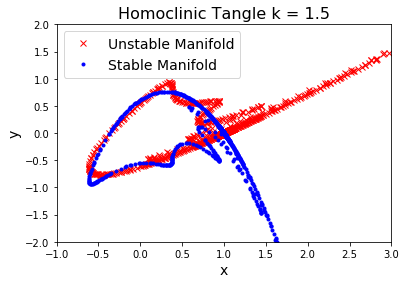

In [19]:
kplot(1.5,15)

## `gen_animation` Demo
The function `gen_animation` takes in a value (or list of values) for the $ k $ parameter and desired number of iterations of the mapping. It generates 100 points on an interval of length 0.0001 on the stable and unstable manifolds. It then generates an animation of the successive mappings forward in time. For example, let $ k = 1.5 $ with 15 iterations.

In [20]:
gen_animation(1.5,15)

KeyError: u'ffmpeg'